In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [6]:
df = pd.read_csv('bengaluru_house_prices.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [7]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__arrow_c_stream__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__dataframe_consortium_standard__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pandas_priority__',
 '__pos__',
 '__pow__',
 '__r

In [9]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [10]:
df.shape

(13320, 9)

In [13]:
df.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [16]:
df.groupby('area_type').agg('count')

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


In [18]:
df.area_type.nunique()

4

In [20]:
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [22]:
df1 = df.drop(['area_type', 'society','balcony', 'availability'], axis='columns')

In [24]:
df1

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [26]:
df1.groupby('location')['location'].agg('count')

location
 Anekal                 1
 Banaswadi              1
 Basavangudi            1
 Bhoganhalli            1
 Devarabeesana Halli    6
                       ..
t.c palya               1
tc.palya                4
vinayakanagar           1
white field,kadugodi    1
whitefiled              1
Name: location, Length: 1305, dtype: int64

In [28]:
df2 = df1.dropna()
df2.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [29]:
df2

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [31]:
df2['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [33]:
df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))

C:\Users\shoab\AppData\Local\Temp\ipykernel_4780\1142257054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['bhk'] = df2['size'].apply(lambda x: int(x.split(' ')[0]))


In [34]:
df2

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00,5
13316,Richards Town,4 BHK,3600,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00,4


In [35]:
df2['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [36]:
df2[df2.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [37]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [38]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [39]:
df2[~df2['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [40]:
df2[~df2['total_sqft'].apply(is_float)].head(10)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [47]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) ==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [49]:
convert_sqft_to_num('2166')

2166.0

In [51]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [54]:
convert_sqft_to_num('4125Perch')

In [59]:
df3 = df2.copy()

In [60]:
df3['total_sqft'] = df3['total_sqft'].apply(convert_sqft_to_num)

In [61]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [63]:
df3.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [64]:
df3

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [65]:
df4 = df3.copy()

In [66]:
df4

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4


In [67]:
df4['price_per_sqrt'] = df4['price']*100000/df4['total_sqft']

In [68]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [69]:
df4['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [71]:
len(df4['location'].unique())

1304

In [73]:
df4.location = df4.location.apply(lambda x: x.strip())

In [74]:
df4.location

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
13319                Doddathoguru
Name: location, Length: 13246, dtype: object

In [76]:
location_stat = df4.groupby('location')['location'].agg('count')

In [78]:
location_stat

location
1 Annasandrapalya                                  1
1 Giri Nagar                                       1
1 Immadihalli                                      1
1 Ramamurthy Nagar                                 1
12th cross srinivas nagar banshankari 3rd stage    1
                                                  ..
t.c palya                                          1
tc.palya                                           4
vinayakanagar                                      1
white field,kadugodi                               1
whitefiled                                         1
Name: location, Length: 1293, dtype: int64

In [80]:
location_stat.sort_values(ascending=False)

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [82]:
len(location_stat[location_stat <=10])

1052

In [85]:
location_threshold = len(location_stat[location_stat <=5])

In [91]:
df4.location = df4.location.apply(lambda x: "other" if x not in location_threshold else x)

In [90]:
location_threshold = (location_stat[location_stat <=5])

In [92]:
df4

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,other,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,other,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,other,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,other,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,other,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,other,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [93]:
len(df4.location.unique())

909

In [94]:
df4[df4.total_sqft/df4.bhk<300]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,other,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,other,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,other,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,100.0,3,20000.000000
...,...,...,...,...,...,...,...
13277,other,7 Bedroom,1400.0,7.0,218.0,7,15571.428571
13279,other,6 Bedroom,1200.0,5.0,130.0,6,10833.333333
13281,other,5 Bedroom,1375.0,5.0,125.0,5,9090.909091
13303,other,5 Bedroom,774.0,5.0,70.0,5,9043.927649


In [95]:
df5 = df4[~(df4.total_sqft/df4.bhk<200)]

In [96]:
df5

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,other,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,other,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,other,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,other,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,other,2 BHK,1200.0,2.0,51.00,2,4250.000000
...,...,...,...,...,...,...,...
13315,other,5 Bedroom,3453.0,4.0,231.00,5,6689.834926
13316,other,4 BHK,3600.0,5.0,400.00,4,11111.111111
13317,other,2 BHK,1141.0,2.0,60.00,2,5258.545136
13318,other,4 BHK,4689.0,4.0,488.00,4,10407.336319


In [97]:
df5.price_per_sqrt

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqrt, Length: 12906, dtype: float64

In [98]:
df5.price_per_sqrt.describe()

count     12860.000000
mean       6496.719070
std        4344.787424
min         267.829813
25%        4240.119848
50%        5357.142857
75%        7094.306991
max      176470.588235
Name: price_per_sqrt, dtype: float64

In [99]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqrt)
        st = np.std(subdf.price_per_sqrt)
        reduced_df = subdf[(subdf.price_per_sqrt>(m-st)) & (subdf.price_per_sqrt<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
df6 = remove_pps_outliers(df5)

In [103]:
df6

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.0,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.0,4,4761.904762
3,1st Stage Indira Nagar,2 BHK,1400.0,2.0,67.0,2,4785.714286
4,1st Stage Indira Nagar,2 BHK,1200.0,2.0,55.0,2,4583.333333
...,...,...,...,...,...,...,...
10705,other,1 BHK,550.0,1.0,17.0,1,3090.909091
10706,south,3 Bedroom,2400.0,2.0,480.0,3,20000.000000
10707,tc.palya,2 Bedroom,880.0,2.0,48.0,2,5454.545455
10708,tc.palya,2 Bedroom,1000.0,2.0,55.0,2,5500.000000


In [104]:
def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

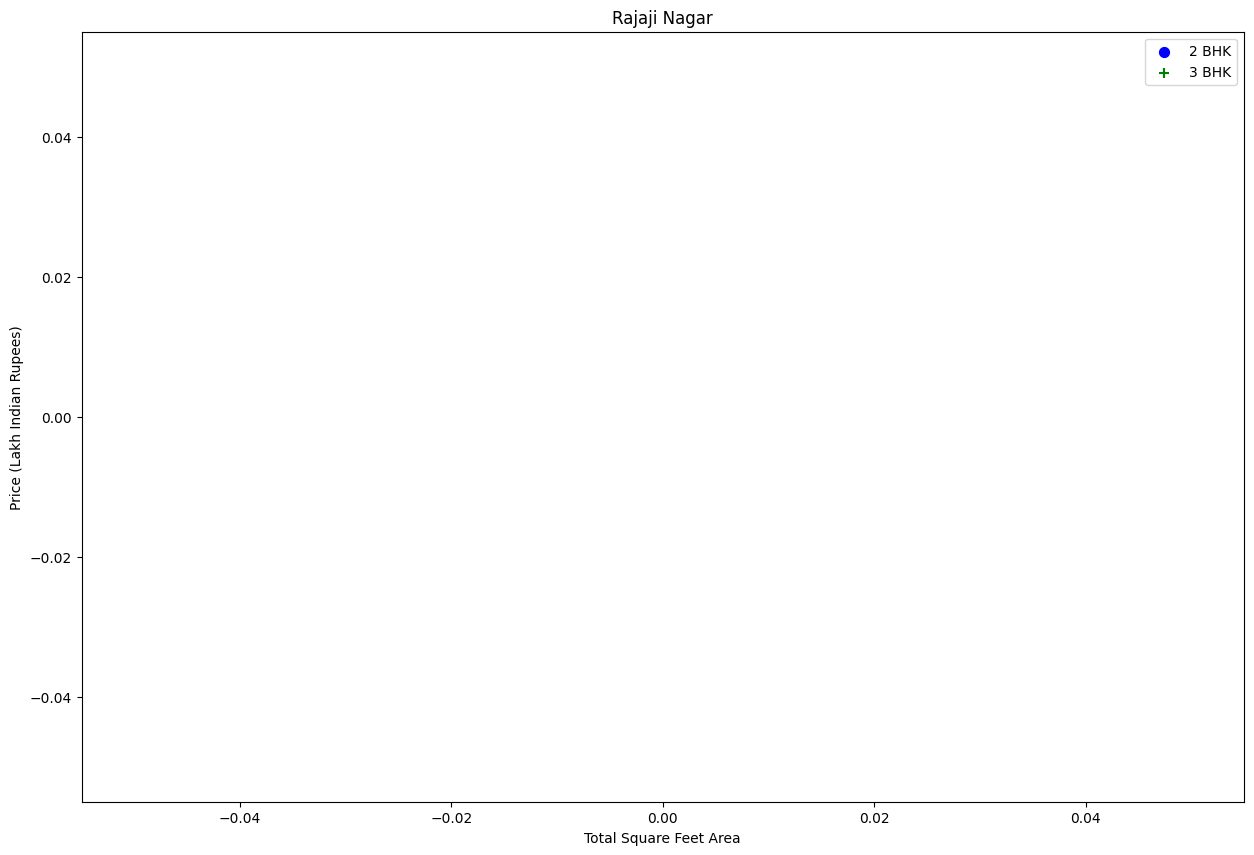

In [105]:
plot_scatter_chart(df6,"Rajaji Nagar")

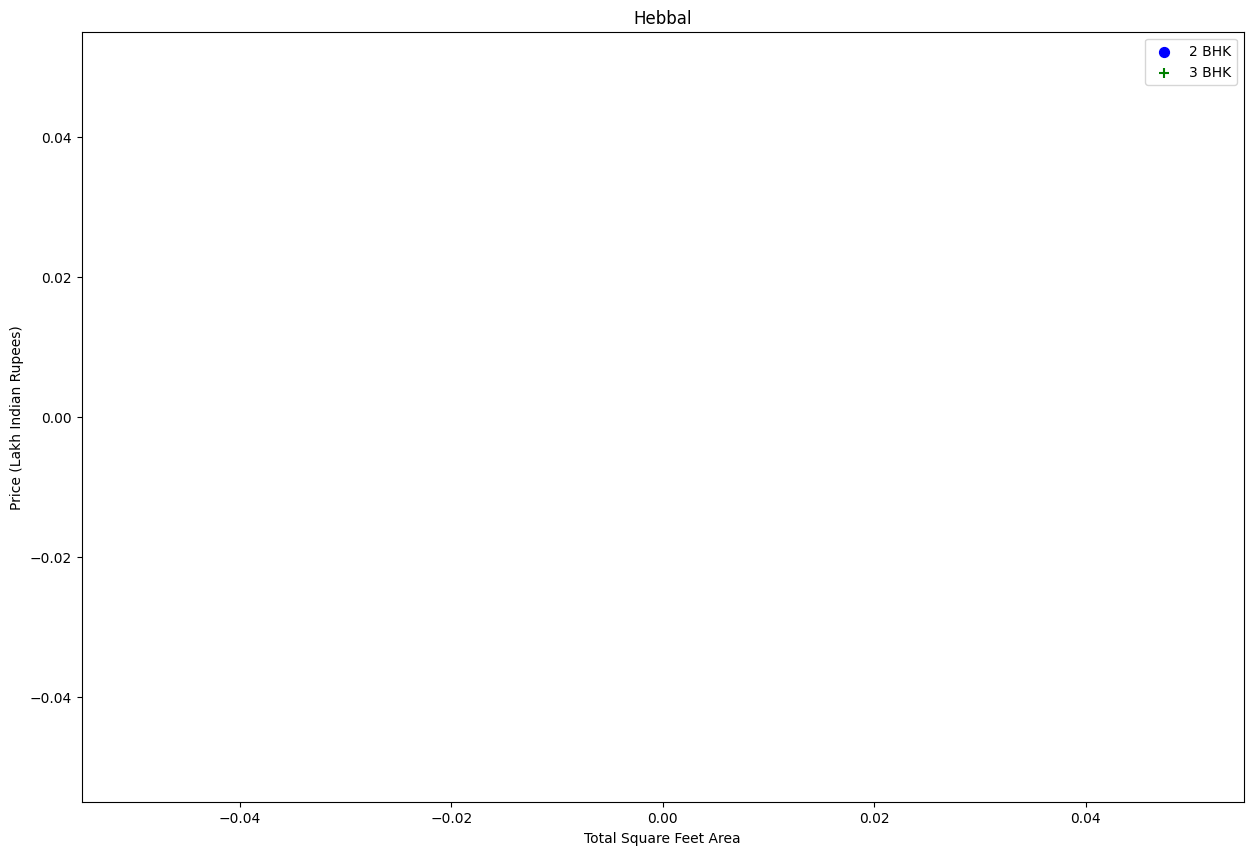

In [131]:
plot_scatter_chart(df6,"Hebbal")

In [106]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqrt),
                'std': np.std(bhk_df.price_per_sqrt),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqrt<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
df7 = remove_bhk_outliers(df6)


In [107]:
df7

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.0,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.0,4,4761.904762
3,1st Stage Indira Nagar,2 BHK,1400.0,2.0,67.0,2,4785.714286
4,1st Stage Indira Nagar,2 BHK,1200.0,2.0,55.0,2,4583.333333
...,...,...,...,...,...,...,...
10705,other,1 BHK,550.0,1.0,17.0,1,3090.909091
10706,south,3 Bedroom,2400.0,2.0,480.0,3,20000.000000
10707,tc.palya,2 Bedroom,880.0,2.0,48.0,2,5454.545455
10708,tc.palya,2 Bedroom,1000.0,2.0,55.0,2,5500.000000


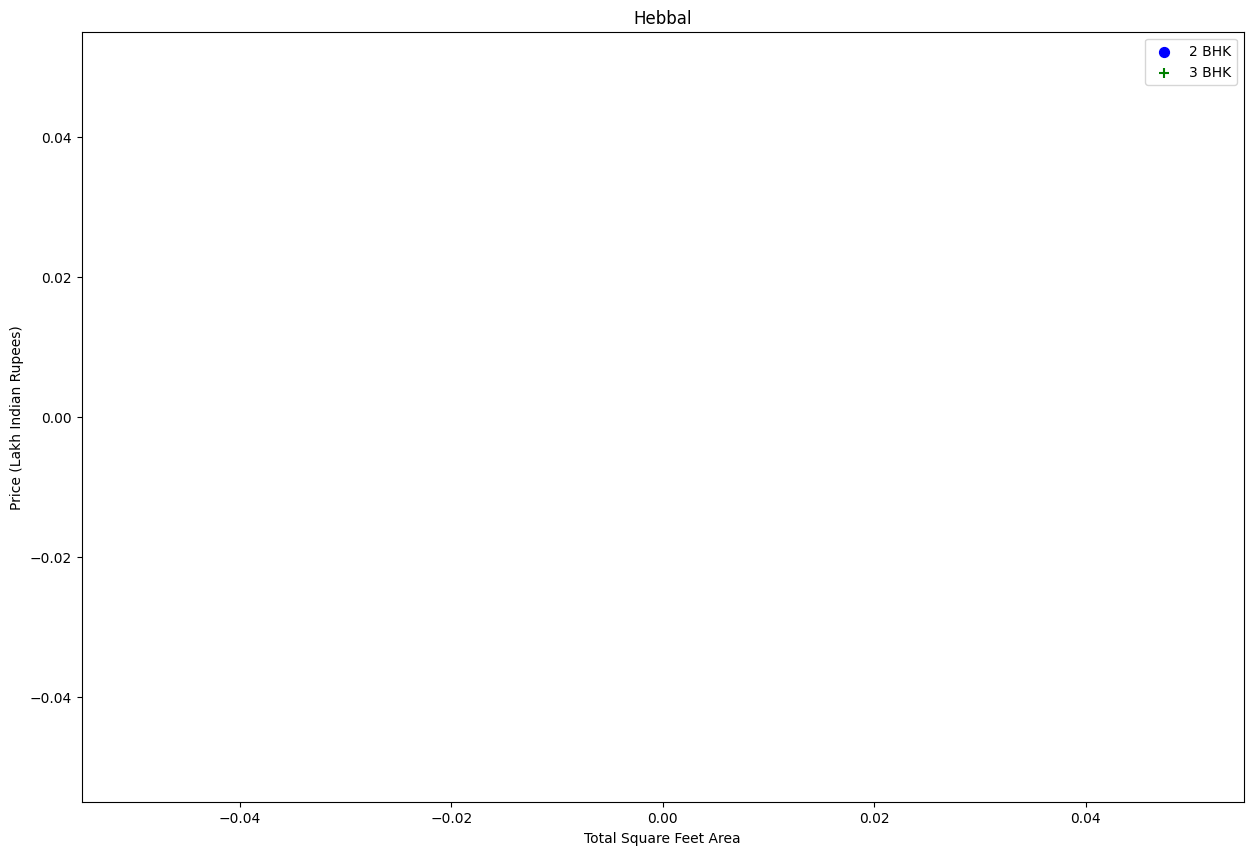

In [108]:
plot_scatter_chart(df7,"Hebbal")

Text(0, 0.5, 'Count')

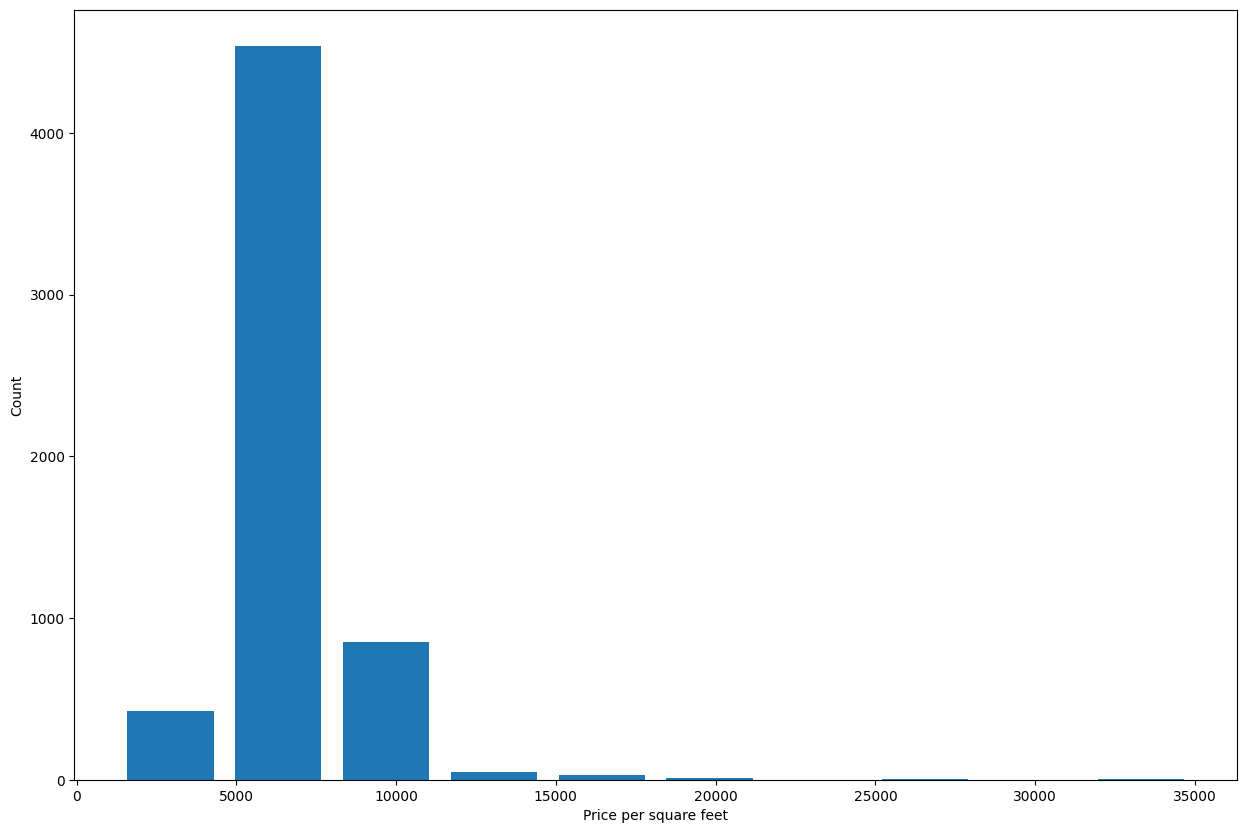

In [109]:
plt.hist(df7.price_per_sqrt, rwidth = 0.8)
plt.xlabel("Price per square feet")
plt.ylabel("Count")

In [110]:
df7.bath.unique()

array([3., 1., 4., 2., 8., 6., 5., 7., 9.])

In [112]:
df7[df7.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt


Text(0, 0.5, 'Count')

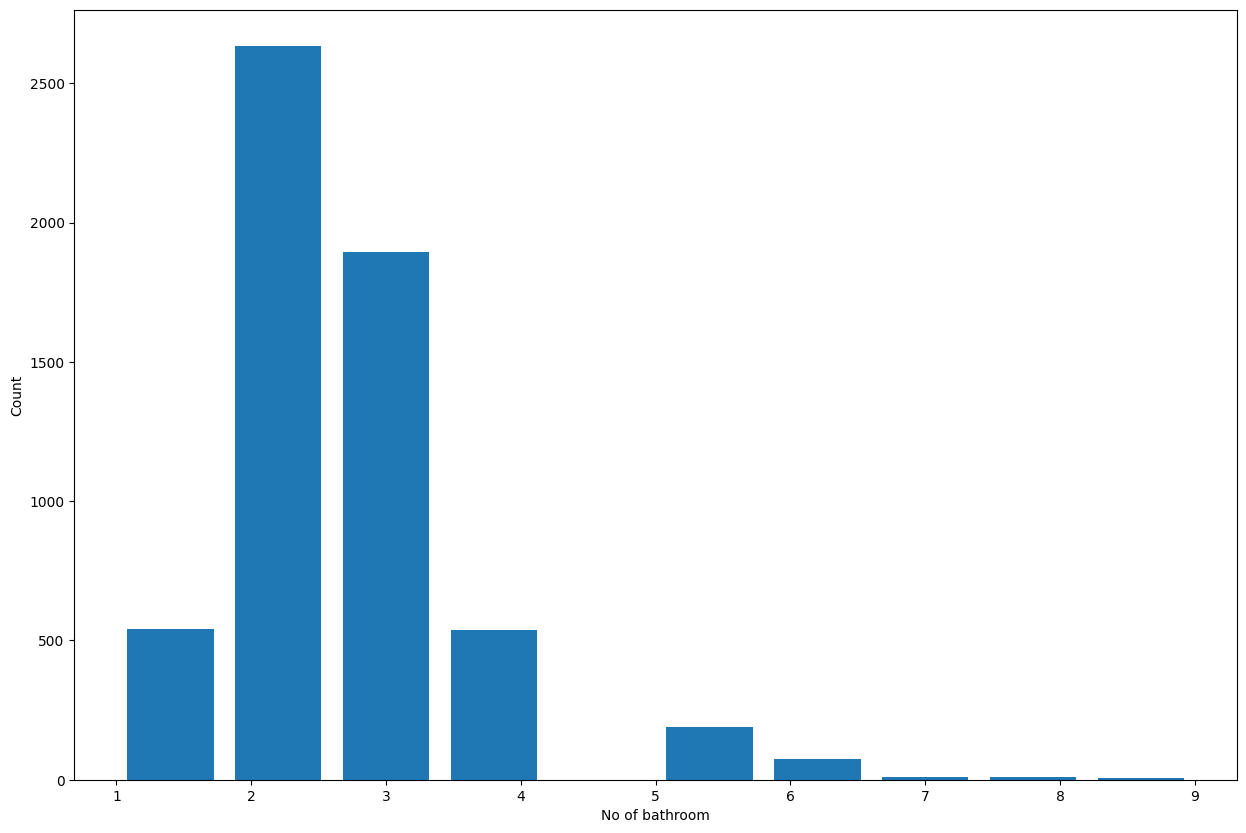

In [113]:
plt.hist(df7.bath, rwidth = 0.8)
plt.xlabel("No of bathroom")
plt.ylabel("Count")

In [114]:
df7[df7.bath> df7.bhk+2]

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
2683,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689
9230,other,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
9784,other,3 BHK,1806.0,6.0,116.0,3,6423.034330


In [115]:
df8 = df7[df7.bath< df7.bhk+2]

In [116]:
df8

,location,size,total_sqft,bath,price,bhk,price_per_sqrt
0,1st Block BEL Layout,3 BHK,1540.0,3.0,85.0,3,5519.480519
1,1st Block HBR Layout,1 BHK,600.0,1.0,45.0,1,7500.000000
2,1st Block HBR Layout,4 BHK,3150.0,4.0,150.0,4,4761.904762
3,1st Stage Indira Nagar,2 BHK,1400.0,2.0,67.0,2,4785.714286
4,1st Stage Indira Nagar,2 BHK,1200.0,2.0,55.0,2,4583.333333
...,...,...,...,...,...,...,...
10705,other,1 BHK,550.0,1.0,17.0,1,3090.909091
10706,south,3 Bedroom,2400.0,2.0,480.0,3,20000.000000
10707,tc.palya,2 Bedroom,880.0,2.0,48.0,2,5454.545455
10708,tc.palya,2 Bedroom,1000.0,2.0,55.0,2,5500.000000


In [117]:
df9 = df8.drop(['size','price_per_sqrt'],axis='columns')

In [118]:
df9

,location,total_sqft,bath,price,bhk
0,1st Block BEL Layout,1540.0,3.0,85.0,3
1,1st Block HBR Layout,600.0,1.0,45.0,1
2,1st Block HBR Layout,3150.0,4.0,150.0,4
3,1st Stage Indira Nagar,1400.0,2.0,67.0,2
4,1st Stage Indira Nagar,1200.0,2.0,55.0,2
...,...,...,...,...,...
10705,other,550.0,1.0,17.0,1
10706,south,2400.0,2.0,480.0,3
10707,tc.palya,880.0,2.0,48.0,2
10708,tc.palya,1000.0,2.0,55.0,2


In [119]:
dummies = pd.get_dummies(df9.location)

In [120]:
dummies

,1st Block BEL Layout,1st Block HBR Layout,1st Stage Indira Nagar,2nd Block Jayanagar,2nd Stage Arekere Mico Layout,3rd Block Banashankari,3rd Block Jayanagar,3rd Block Koramangala,3rd Phase JP Nagar,4th Block Jayanagar,...,Vittal Nagar,Vivek Nagar,"Whitefield,",Yarandahalli,Yeshwanthpur Industrial Suburb,frazertown,manyata park,other,south,tc.palya
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
10706,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10707,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10708,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [121]:
df10 = pd.concat([df9, dummies.drop('other', axis = 'columns')], axis = 'columns')

In [122]:
df10

,location,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Stage Indira Nagar,2nd Block Jayanagar,2nd Stage Arekere Mico Layout,...,Vishwapriya Nagar,Vittal Nagar,Vivek Nagar,"Whitefield,",Yarandahalli,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1st Block BEL Layout,1540.0,3.0,85.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block HBR Layout,600.0,1.0,45.0,1,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block HBR Layout,3150.0,4.0,150.0,4,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Stage Indira Nagar,1400.0,2.0,67.0,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Stage Indira Nagar,1200.0,2.0,55.0,2,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,other,550.0,1.0,17.0,1,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10706,south,2400.0,2.0,480.0,3,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10707,tc.palya,880.0,2.0,48.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10708,tc.palya,1000.0,2.0,55.0,2,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [123]:
df10.drop('location', axis = 'columns', inplace=True)

In [124]:
df10

,total_sqft,bath,price,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Stage Indira Nagar,2nd Block Jayanagar,2nd Stage Arekere Mico Layout,3rd Block Banashankari,...,Vishwapriya Nagar,Vittal Nagar,Vivek Nagar,"Whitefield,",Yarandahalli,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1540.0,3.0,85.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,600.0,1.0,45.0,1,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3150.0,4.0,150.0,4,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1400.0,2.0,67.0,2,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,55.0,2,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,550.0,1.0,17.0,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10706,2400.0,2.0,480.0,3,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10707,880.0,2.0,48.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10708,1000.0,2.0,55.0,2,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [137]:
X = df10.drop('price', axis = 'columns')
X

,total_sqft,bath,bhk,1st Block BEL Layout,1st Block HBR Layout,1st Stage Indira Nagar,2nd Block Jayanagar,2nd Stage Arekere Mico Layout,3rd Block Banashankari,3rd Block Jayanagar,...,Vishwapriya Nagar,Vittal Nagar,Vivek Nagar,"Whitefield,",Yarandahalli,Yeshwanthpur Industrial Suburb,frazertown,manyata park,south,tc.palya
0,1540.0,3.0,3,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,600.0,1.0,1,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3150.0,4.0,4,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1400.0,2.0,2,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1200.0,2.0,2,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10705,550.0,1.0,1,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10706,2400.0,2.0,3,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
10707,880.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
10708,1000.0,2.0,2,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [138]:
y = df10.price

In [139]:
y

0         85.0
1         45.0
2        150.0
3         67.0
4         55.0
         ...  
10705     17.0
10706    480.0
10707     48.0
10708     55.0
10709     78.0
Name: price, Length: 5827, dtype: float64

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [141]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [142]:
model.fit(x_train, y_train)

LinearRegression()

In [143]:
model.score(x_test, y_test)

0.8144620178480639

In [144]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([-5.74220980e+13,  8.00349647e-01, -1.38342048e+17, -9.87500938e+14,
        8.88503685e-01])

In [159]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
                'model': DecisionTreeRegressor(),
                'params': {
                    'criterion': ['friedman_mse', 'absolute_error', 'squared_error', 'poisson'],
                'splitter': ['best', 'random'],
                'max_depth': [None, 10, 20, 30]
            }
        }
        },
        'random_forest': {
            'model': RandomForestRegressor(),
            'params': {
                'n_estimators': [50, 100, 150],
                'max_depth': [None, 10, 20]
            }
        },
            'naive_bayes': {
            'model': GaussianNB(),
            'params': {
                
            }
        },
        'svm': {
            'model': SVR(),
            'params': {
                'kernel': ['linear', 'rbf'],
                'C': [1, 10, 100],
                'gamma': ['scale', 'auto']
            }
        },
        'gradient_boosting': {
            'model': GradientBoostingRegressor(),
            'params': {
                'loss': ['ls', 'lad', 'huber'],
                'learning_rate': [0.1, 0.01],
                'n_estimators': [100, 200],
                'max_depth': [3, 5]
            }
        },
        'knn': {
            'model': KNeighborsRegressor(),
            'params': {
                'n_neighbors': [3, 5, 7],
                'weights': ['uniform', 'distance'],
                'algorithm': ['auto', 'ball_tree', 'kd_tree']
            }
        },
        'logistic_regression': {
            'model': LogisticRegression(max_iter = 10000),
            'params': {
                'penalty': ['l1', 'l2'],
                'C': [0.1, 1, 10]
            }
        }

    
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

In [146]:
X.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block BEL Layout',
       '1st Block HBR Layout', '1st Stage Indira Nagar', '2nd Block Jayanagar',
       '2nd Stage Arekere Mico Layout', '3rd Block Banashankari',
       '3rd Block Jayanagar',
       ...
       'Vishwapriya Nagar', 'Vittal Nagar', 'Vivek Nagar', 'Whitefield,',
       'Yarandahalli', 'Yeshwanthpur Industrial Suburb', 'frazertown',
       'manyata park', 'south', 'tc.palya'],
      dtype='object', length=399)

In [149]:
def predict_price(location, sqrt, bath, bhk, X, model):
    loc_index = np.where(X.columns == location)[0][0] if location in X.columns else -1

    x = np.zeros(len(X.columns))
    x[0] = sqrt
    x[1] = bath
    x[2] = bhk

    if loc_index >= 0:
        x[loc_index] = 1
    
    return model.predict([x])[0]






In [150]:
predicted_price = predict_price('1st Phase JP Nagar', 1000, 2, 2, X, model)

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [151]:
predicted_price

61.27941764801707

In [152]:
predict_price('1st Phase JP Nagar', 1000, 3, 3, X, model)

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.94351334741431

In [154]:
predict_price('Vittal Nagar', 1500, 3, 3, X, model)

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


103.04002953040556

In [156]:
predict_price('Indira Nagar', 1000, 3, 3, X, model)

C:\Users\shoab\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65.94351334741431

In [157]:
import pickle
with open('home_prices_model.pickle', 'wb') as f:
    pickle.dump(model, f)

In [159]:
import json


columns = {
    'data_columns': [col.lower() for col in X.columns]
}


filename = "columns.json"


with open(filename, "w") as f:
    json.dump(columns, f)
